# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

**Шаги для выбора локации:**

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Описание данных**  
Данные геологоразведки трёх регионов находятся в файлах: geo_data_0.csv, geo_data_1.csv, geo_data_2.csv
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).  

**Условия задачи:**  
- Использовать модель линейной регрессии (остальные — недостаточно предсказуемые).
- Исследовать 500 точек при геологоразведке, выбрать 200 с наибольшими запасами для расчёта прибыли.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- Стоимость одного барреля нефти 450 рублей. Объём указан в 1000 баррелей.
- Выбрать регионы, в которых вероятность убытков меньше 2.5%. Среди регионов, прошедших оценку рисков, выбрать один с наибольшей средней прибылью. 

## Загрузка и подготовка данных

In [1]:
#подключение библиотек, используемых в проекте
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from tqdm import tqdm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#определим свпомогательную функцию
def df_read_and_info(file_name):
    try:
        df = pd.read_csv('/datasets/' + file_name)
    except:
        df = pd.read_csv('datasets\\' + file_name)
    df.info()
    display(df.head())
    print('Дубликатов в исходных данных: ',df.duplicated().sum())
    return df

In [3]:
df0 = df_read_and_info('geo_data_0.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Дубликатов в исходных данных:  0


In [4]:
df1 = df_read_and_info('geo_data_1.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Дубликатов в исходных данных:  0


In [5]:
df2 = df_read_and_info('geo_data_2.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Дубликатов в исходных данных:  0


In [6]:
#создадим список датасетов для удобства дальнейшей работы с данными 
df_list = [df0, df1, df2]
df_list_names = ['geo_data_0', 'geo_data_1', 'geo_data_2']

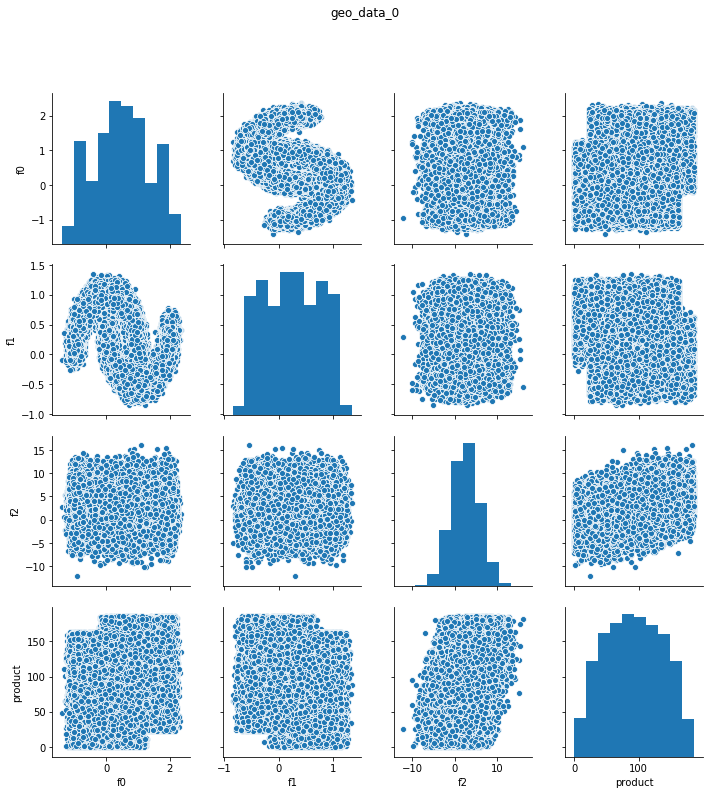

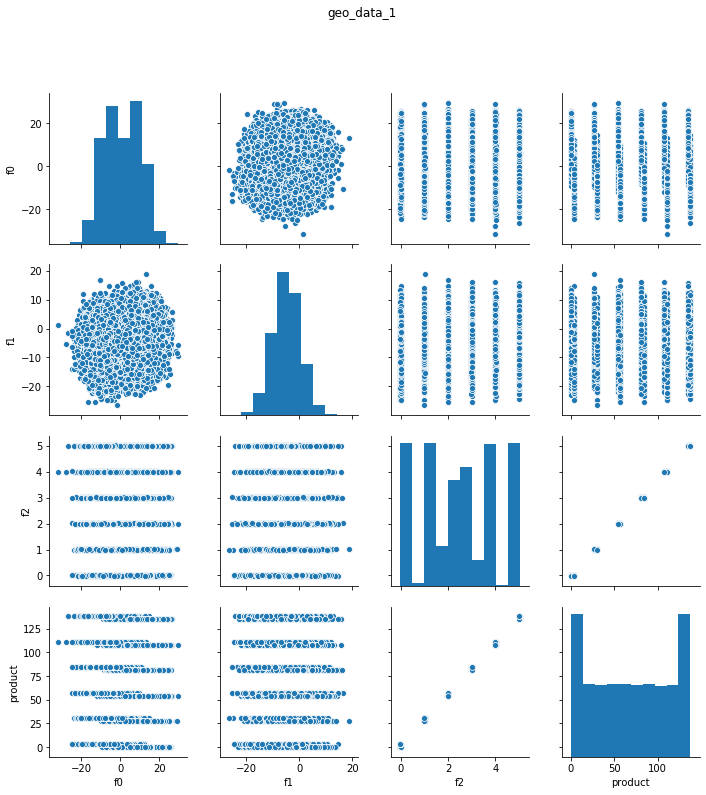

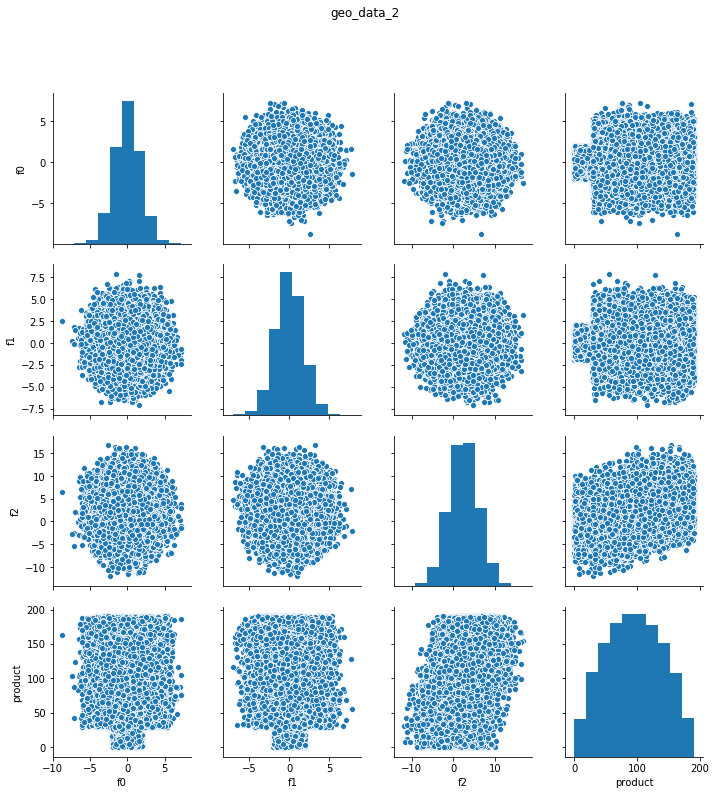

In [7]:
for i in range(len(df_list)):
    g = sb.pairplot(df_list[i])
    g.fig.suptitle(df_list_names[i], y=1.1)

### Выводы

- Данные успешно загружены из файлов: geo_data_0.csv, geo_data_1.csv, geo_data_2.csv
- По каждому региону представлена информация по 100000 объектам, состав данных соответствует описанию
- Пропусков и дубликатов в данных нет
- После анализа гисторгамм и диаграмм рассеивания возникают подозрения в том, что набор данных синтетический, но выполнению задания это не помешает) 

## Обучение и проверка модели

Определим вспомогательную функцию для обучения модели

In [8]:
target_name = ['product']
features_name = ['f0', 'f1', 'f2'] 
numeric_col = features_name
rnd_state=42

In [9]:
def model_logistic_regression(df):
    features = df[features_name]
    target = df[target_name]
    features_train, features_valid, target_train, target_valid = train_test_split(
            features, target, test_size=0.25, random_state=rnd_state)

    print('Выполнено разбиение:') 
    print('Размер обучающей выборки =', len(target_train))
    print('Размер валидационной выборки =', len(target_valid))
   
    scaler = StandardScaler()
    scaler.fit(features_train[numeric_col])
    features_train.loc[:,numeric_col] = scaler.transform(features_train[numeric_col])
    features_valid.loc[:,numeric_col] = scaler.transform(features_valid[numeric_col])
       
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions)**0.5

    print("--------------------------------------------")
    print("Cредний запас предсказанного сырья (модель):", round(predictions.mean(),2))
    print("Cредний запас сырья (факт):", round(target_valid.mean(),2))
    print("RMSE модели:", round(rmse,2))
    print("--------------------------------------------")
    
    return pd.Series(target_valid['product'].reset_index(drop=True)), pd.DataFrame(predictions)[0]   

In [10]:
target_list = []
prediction_list = []
option = pd.get_option('chained_assignment')
pd.set_option('chained_assignment',None)
for i in range(len(df_list)):
    print('Расчет для региона ', df_list_names[i])
    targ, pred = model_logistic_regression(df_list[i])
    target_list.append(targ)
    prediction_list.append(pred)
    print('')
    
pd.set_option('chained_assignment',option)

Расчет для региона  geo_data_0
Выполнено разбиение:
Размер обучающей выборки = 75000
Размер валидационной выборки = 25000
--------------------------------------------
Cредний запас предсказанного сырья (модель): 92.4
Cредний запас сырья (факт): product    92.33
dtype: float64
RMSE модели: 37.76
--------------------------------------------

Расчет для региона  geo_data_1
Выполнено разбиение:
Размер обучающей выборки = 75000
Размер валидационной выборки = 25000
--------------------------------------------
Cредний запас предсказанного сырья (модель): 68.71
Cредний запас сырья (факт): product    68.73
dtype: float64
RMSE модели: 0.89
--------------------------------------------

Расчет для региона  geo_data_2
Выполнено разбиение:
Размер обучающей выборки = 75000
Размер валидационной выборки = 25000
--------------------------------------------
Cредний запас предсказанного сырья (модель): 94.77
Cредний запас сырья (факт): product    95.15
dtype: float64
RMSE модели: 40.15
-------------------

### Выводы

Для каждого региона обучена и проверена модель линейной регрессии:
- Данные разбиты на обучающую и валидационную выборки в соотношении 75:25.
- Обучена модель и рассчитаны предсказания на валидационной выборке.
- Сохранены предсказания и правильные ответы на валидационной выборке.
- Выведен средний запас предсказанного сырья и RMSE модели.
- В регионе 0 и 2 модель предсказывает в среднем больший запас сырья для каждого объекта (92.4, 94.77), чем в регионе 1 (68.71).
- RMSE модели для региона 1 (0.89) значительно меньше, чем для регионов 0 и 2 (37.76, 40.15). Данный результат был предсказуем вследствии высокой корреляции для региона 1 признака f2 с целевым показателем product


## Подготовка к расчёту прибыли

Сохраним исходные данные для расчетов в отдельных переменных (это позволит при изменении условий от Заказчика не переписывать исходный код функций, а поменять только значения переменных)

In [11]:
points_count = 500
best_points = 200
budget = 10**10
point_revenue = 450000
risk_max = 0.025

#бюджет делим на количество разрабатываемых скважин и доход с одной 1000 баррелей
product_min = budget/(best_points*point_revenue)
print('Минимальный объем добычи для сохранения безыбуточности новой скважины составляет ', round(product_min,2), 'тыс. баррелей')

Минимальный объем добычи для сохранения безыбуточности новой скважины составляет  111.11 тыс. баррелей


### Выводы

- Ключевые значения для расчётов прибыли сохранены в отдельных переменных.
- Достаточный объём сырья для безубыточной разработки новой скважины составил 111.11 тысяч баррелей
- Для всех регионов средний запас предсказанного сырья меньше достаточного объема для безубыточной разработки, без машинного обучения при выборе скважин не обойтись


## Расчёт прибыли и рисков 

По условиям задачи нам нужно с помощью метода Bootstrap рассчитать среднюю прибыль, 95% доверительный интервал и риск убытков. Опеределим вспомогательные функции

In [12]:
def revenue(predictions, target, count):    
    selected = target[predictions.sort_values(ascending=False).index][:count]
    return point_revenue * selected.sum() - budget

In [13]:
def bootstrap(predictions, target):
    state = np.random.RandomState(rnd_state)
    
    values = []
    for i in range(1000):
        target_subsamples = target.sample(n=points_count, replace=True, random_state=state)
        predictions_subsamples = predictions[target_subsamples.index]
        values.append(revenue(predictions_subsamples, target_subsamples, best_points))
 
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean_profit = values.mean()
    loss = np.mean(values < 0)
    return mean_profit, lower, upper, loss

In [14]:
for i in range(len(df_list)):
    mean_profit, lower, upper, loss = bootstrap(prediction_list[i], target_list[i])
    print('Расчет для региона ', df_list_names[i])
    print("--------------------------------------------")
    print("Средняя прибыль при разработке 200 лучших скважин (выбранных из 500):", round(mean_profit/10**6,2), "млн. руб.")
    print("95% интервал для средней прибыли от:", round(lower/10**6,2), "до", round(upper/10**6,2), "млн. руб.") 
    print("Риск убытка:", round(loss*100,2), "%")
    if (loss < risk_max):
        print('Рекомендуется разработка в регионе')
    else:
        print('Риск превышает допустимую границу, разработка в регионе не рекомендуется')
    print("--------------------------------------------")
    print('')

Расчет для региона  geo_data_0
--------------------------------------------
Средняя прибыль при разработке 200 лучших скважин (выбранных из 500): 427.85 млн. руб.
95% интервал для средней прибыли от: -97.25 до 954.22 млн. руб.
Риск убытка: 5.5 %
Риск превышает допустимую границу, разработка в регионе не рекомендуется
--------------------------------------------

Расчет для региона  geo_data_1
--------------------------------------------
Средняя прибыль при разработке 200 лучших скважин (выбранных из 500): 511.36 млн. руб.
95% интервал для средней прибыли от: 98.87 до 940.72 млн. руб.
Риск убытка: 0.9 %
Рекомендуется разработка в регионе
--------------------------------------------

Расчет для региона  geo_data_2
--------------------------------------------
Средняя прибыль при разработке 200 лучших скважин (выбранных из 500): 402.58 млн. руб.
95% интервал для средней прибыли от: -137.16 до 929.89 млн. руб.
Риск убытка: 7.4 %
Риск превышает допустимую границу, разработка в регионе не рек

### Выводы

- Допустимому риску убытков соответствует только регион 1, также в этом регионе максимальная средняя прибыль и положительная нижняя граница 95% доверительного интервала средней прибыли. Рекомендуем для разработки регион 1.

## Общий вывод по проекту

**При выполнении проекта:**

На этапе подготовки данных:  
- Данные успешно загружены из файлов: geo_data_0.csv, geo_data_1.csv, geo_data_2.csv
- По каждому региону представлена информация по 100000 объектам, состав данных соответствует описанию
- Пропусков и дубликатов в данных нет
- После анализа гисторгамм и диаграмм рассеивания возникают подозрения в том, что набор данных синтетический, но выполнению задания это не помешает) 

На этапе подготовки данных для каждого региона обучена и проверена модель линейной регрессии:
- Данные разбиты на обучающую и валидационную выборки в соотношении 75:25.
- Обучена модель и рассчитаны предсказания на валидационной выборке.
- Сохранены предсказания и правильные ответы на валидационной выборке.
- Выведен средний запас предсказанного сырья и RMSE модели.
- В регионе 0 и 2 модель предсказывает в среднем больший запас сырья для каждого объекта (92.4, 94.77), чем в регионе 1 (68.71).
- RMSE модели для региона 1 (0.89) значительно меньше, чем для регионов 0 и 2 (37.76, 40.15). Данный результат был предсказуем вследствии высокой корреляции для региона 1 признака f2 с целевым показателем product

На этапе подготовки к расчету прибыли:
- Ключевые значения для расчётов прибыли сохранены в отдельных переменных.
- Достаточный объём сырья для безубыточной разработки новой скважины составил 111.11 тысяч баррелей
- Для всех регионов средний запас предсказанного сырья меньше достаточного объема для безубыточной разработки, без машинного обучения при выборе скважин не обойтись

На этапе расчета прибыли и рисков:
- С помощью метода Bootstrap рассчитана средняя прибыль, 95% доверительный интервал и риск убытков.
- Допустимому риску убытков соответствует только регион 1, также в этом регионе максимальная средняя прибыль и положительная нижняя граница 95% доверительного интервала средней прибыли. 

**Рекомендуем для разработки регион 1.**  
**Средняя прибыль при разработке 200 лучших скважин (выбранных из 500): 511.36 млн. руб.**  
**95% интервал для средней прибыли от: 98.87 до 940.72 млн. руб.**  
**Риск убытка: 0.9 %**  

P.S.: Интересная задача. Средний запас сырья выше в 0 и 2 регионах. И если бы не использовалось машинное обучение, то логичнее было бы вести разработку в этих регионах. Но линейная регрессия для данных регионов обучилась некачественно, поэтому при выборе 200 лучших скважин из 500 мы выбираем не самые лучшие по фактическому запасу скважины и риск разработки скважин в данных регионах при использовании данной моедли машинного обучения оказывается слишком высоким.  
При этом в регионе 1 несмотря на меньший средний запас сырья, мы смогли обучить модель машинного обучения с очень низкой ошибкой, поэтому при выборе 200 лучших скважин из 500 мы действительно выбираем лучшие скважины, что способствет снижению риска разработки и увеличению средней прибыли.

На самом деле, мне кажется что нужно либо искать другие признаки, либо пытаться использовать другие модели машинного обучения. Не логично вести разработку в регионе с самым низким запасом сырья.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован